In [1]:
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
import csv
import pandas as pd

In [2]:
df = pd.read_csv('test.csv')

In [3]:
model = load_model('Number_CNN.h5')
x_sub = np.array(df).reshape(-1, 28, 28)
pred = model.predict(x_sub)

875/875 [==============================] - 3s 3ms/step


In [4]:
save = []
for sub in pred:
    save.append(np.argmax(sub))

<Axes: >

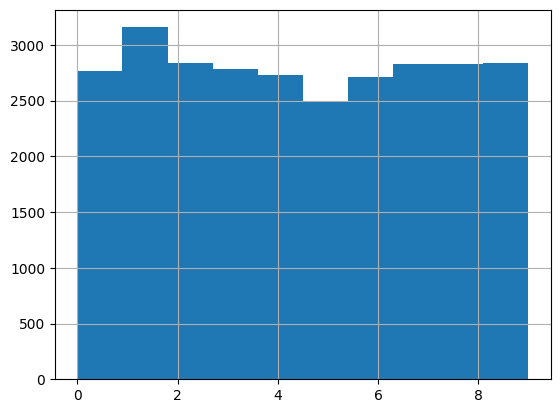

In [5]:
import matplotlib.pyplot as plt
pd.Series(save).hist()

In [6]:
csv_sub = pd.read_csv('submit.csv')
for num in range(len(save)):
    csv_sub.iloc[num][1] = save[num]
csv_sub

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [7]:
csv_sub.to_csv('submit.csv', index = False)

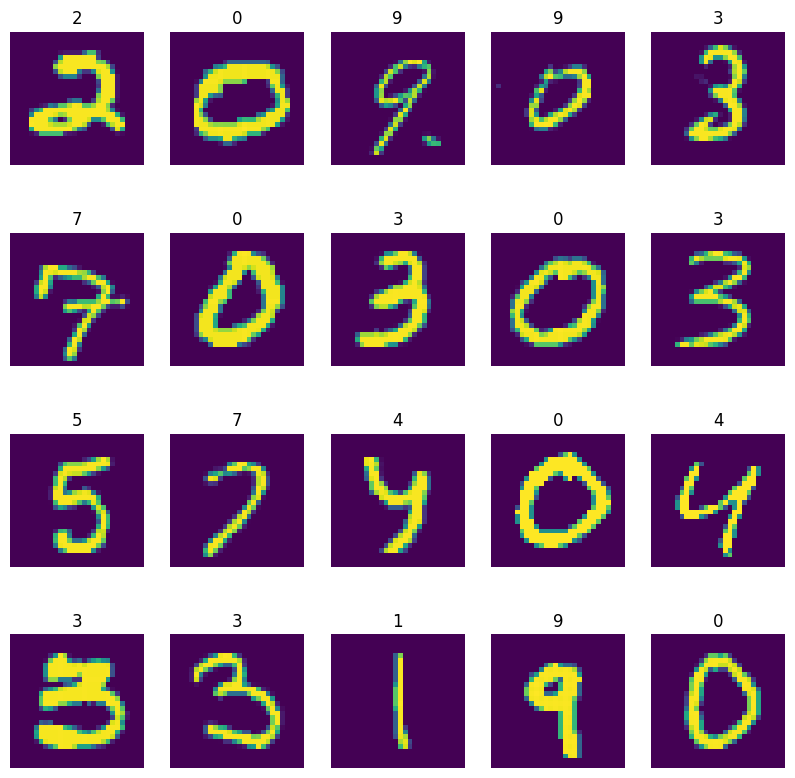

In [8]:
import matplotlib.pyplot as plt
figure, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.ravel()

for index in range(20):
    axes[index].imshow(x_sub[index])
    axes[index].set_title(save[index])
    axes[index].axis("off")

In [10]:
x_sub[0].shape

(28, 28)